# Версионирование кода и git

`Коммит (англ. commit)` – слепок всех отлеживаемых гитом (индексированных) файлов. 
Каждый коммит имеет родительский коммит – предыдущее состояние файла, а совокупность всех коммитов формирует дерево коммитов. 
Название каждого коммита уникально и представляет собой хэш-сумму коммита.

## > Основные команды git

```bash
git init - создать в текущем каталоге новый подкаталог с именем .git, содержащий все необходимые файлы репозитория - структуру Git репозитория.

git add - начать отслеживать (добавление под версионный контроль) новый файл.

git commit - осуществить коммит изменений.

git status - определить состояния файлов.

git diff - определить состояние файлов и того, что конкретно поменялось, а не только какие файлы были изменены (развернутый вариант git status); флаг --staged позволяет увидеть проиндексированные изменения.

git log - вывести историю коммитов; флаг --graph позволяет вывести историю коммитов в виде дерева.

git checkout - переключиться на другой коммит.

git branch - создать новую ветку.

git merge - влить одну ветку в другую.

git clone - клонировать удаленного репозитория.

git pull - получить изменения из удалённой ветки и слить их со своей текущей.

git push - отправить ветку на сервер.

```

## > Стадии работы с git:

1.    Редактирование файла – изменение файла в любом текстовом редакторе.

2.    Добавление файла в staging area – область с изменениями, которые будут включены в следующий коммит.

3.    Сохранение коммита – перманентное сохранение всех собранных в staging area изменений.

## Схема работы git. 

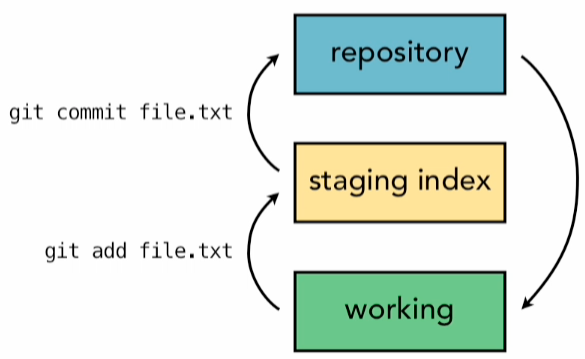

- На стадии working происходит работа с файлом (создание, изменение, удаление). 
- Затем файл переходит на следующую стадию staging - на этой стадии git видит изменения, которые могут войти в следующий коммит, но их еще можно поменять. 
- На финальной стадии repository git навсегда запоминает состояние всех файлов и папок в данный момент времени.

- Для инициализации git в директории, за содержимым которой нужно следить, используется команда git init: 
```bash
git init
touch newfile.txt
```
- Для того, чтобы добавить изменения в файле в staging area, используется комманда git add
```bash
git add newfile.txt
```
- Для проверки статуса файлов, нужно использовать команду git status.
```bash
git status
```
- Для того, чтобы сделать коммит, используется команда git commit.
- В возникшем окне с текстовым редактором необходимо написать описание коммита в настоящем времени.
```bash
git commit
```
-  поменять редактор на Nano
```bash
git config --global core.editor "nano"
```

- Чтобы показать все коммиты используется команда git log; если добавить флаг --graph, то будет выведено дерево коммитов.
```bash
git log
git log --graph
```
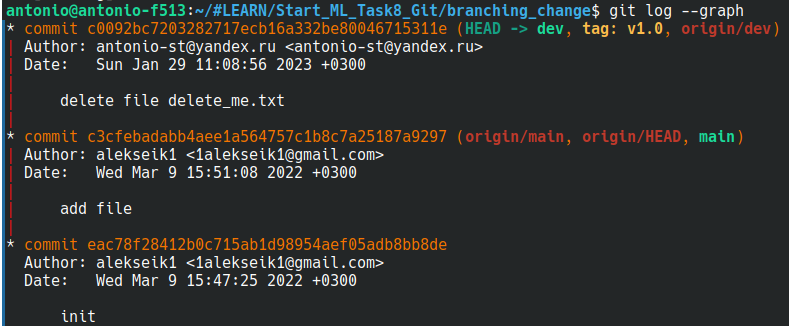
- Команда git diff --staged выводит изменения, добавленные в staging area.
```bash
git diff --staged
```

## > Ветки и теги

`Ветка (англ. branch)` – это указатель на коммит с определенным именем; по веткам можно переключаться между коммитами, когда ведется активная разработка программы.

`Тэг (англ. tag)` – это тоже указатель на коммит, но, в отличие от ветки, он не изменяется; тэги используются для указания коммита, который находится в релизе.

`HEAD` – это указатель на текущий коммит.

Используя ветвление, можно отклоняться от основной линии разработки и продолжать работу независимо от неё, не вмешиваясь в основную линию.

### > Создание веток и переключение между ветками / Сравнение изменений между двумя коммитами
- Создание ветки
```bash
git branch <имя ветки>
```
- переключения между ветками или Одновременно создать ветку и переключится на неё
```bash
git checkout <имя ветки>
git checkout -b <имя ветки>
```

- позволяет сравнить изменения между двумя коммитам
```bash
git diff <имя одной ветки> <имя другой ветки>
```
- создание тэга
```bash
git tag v1.0
```
![image-2.png](attachment:image-2.png)

## > Перемещение по коммитам

- Переместиться в другой коммит можно с использованием команды git checkout <хэш-сумма коммита>, предварительно узнав хэш-сумму коммита командой git log.
- Если нужно перейти на один коммит назад, используется команда git checkout HEAD~1.

```bash
$ git log
# commit 4e66933d8ef597399a5e82fe8a76d310cf47aa0d (HEAD -> feature)

$ git log
$ git checkout 4e66933d8ef597399a5e82fe8a76d310cf47aa0d

$ git checkout HEAD~1

```

## > Объединение изменений 

Для объединения изменений из текущей ветки и другой ветки используется команда `git merge <имя ветки>`. В процессе объединения веток будет создан коммит с двумя родителями (англ. merge commit), в котором будут записаны все изменения из обеих веток.

### Простой сценарий
Пусть была ветка `iss53`, в которой сделано несколько коммитов. Мы захотели все изменения оттуда добавить в `master`:

![Ветки до слияния](https://git-scm.com/book/en/v2/images/basic-merging-1.png)

В процессе слияния будет создан коммит с **двумя** родителями (он называется _merge commit_), в котором будут применены все необходимые изменения (там, где коды различаются между ветками). Ветка, _куда_ были слиты изменения, перемотается вперед до созданного merge commit.
Схематично это выглядит так:

![Ветки после слияния](https://git-scm.com/book/en/v2/images/basic-merging-2.png)

```bash

git checkout master 'переключиться на ветку в которую будем слияние'
git merge feature 'объединить ветки'
git reset --merge ORIG_HEAD 'отменить merge'
```

## 2 > Конфликт слияния веток


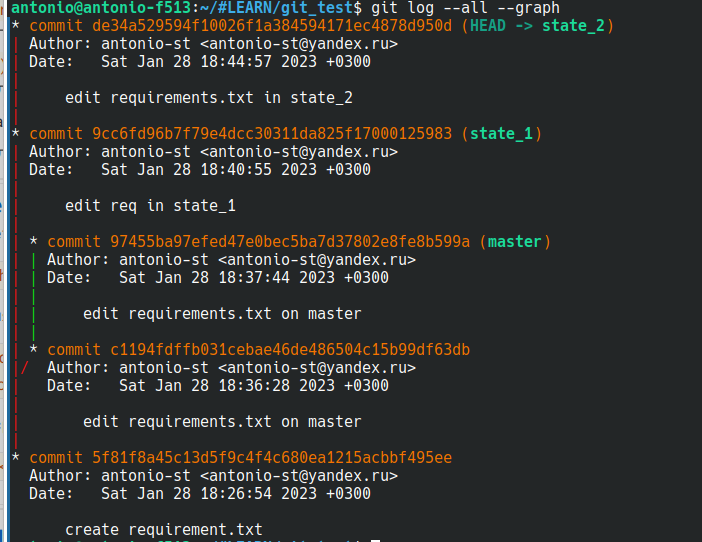

- простое слияние
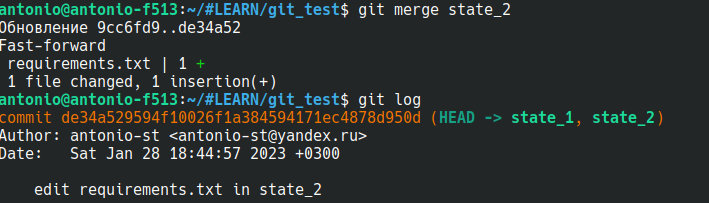

- конфликт: ветка state_1 requirements.txt пустой

При слиянии веток возможны конфликты. Это случается, когда в старой ветке файл был изменен с момента "отпочкования" новой ветки. Такие конфликты приходится решать вручную:

Через консольный git приходится редактировать частично слитые файлы руками



## Стратегии ветвления
По какому принципу создавать ветки? На это в сообществе есть несколько ответов, все со своими достоинствами и недостатками.

### master, dev и тематическая ветка (GitFlow)
_Сейчас не особо популярен_.

Подход, базирующийся на следующих принципах:
- В ветке `master` всегда стабильный и работающий код и только он.
- В ветке `dev` находится слияние всех наработок, который войдут в следующую стабильную версию. Ветка является полигоном для испытания нового функционала.
- В тематических ветках находится решение одной конкретной задачи. Скажем, реализация определенной функции или исправление определенной ошибки.


Помимо этого, могут создаваться и другие ветки: `release`, `hotfix`, куда будут уходить только релизы и только хот-фиксы. А затем эти ветки могут сливаться друг с другом :)

Схематично это выглядит так:

![Простой GitFlow](https://git-scm.com/book/en/v2/images/lr-branches-2.png)

А в случае наличия release-веток:

<div>
<img src="https://wac-cdn.atlassian.com/dam/jcr:8f00f1a4-ef2d-498a-a2c6-8020bb97902f/03%20Release%20branches.svg?cdnVersion=199" width="900"/>
</div>

Процесс работы строится следующим образом:
- От `dev` создается тематическая ветка, где ведется работа над одной проблемой. Скажем, `issue_1`
- В конце работы над задачей тематическая ветка (`issue_1`) вливается в ветку `dev`. Так делается с каждой тематической веткой.
- Как только разработчики проекта понимают, что код достаточно зрелый для выпуска следующей версии, ветка `dev` вливается в `master`.
- При этом могут все равно случиться проблемы в `master`. Поэтому иногда в `master` отправляются коммиты напрямую, не через слияние с `dev`. Это называется `hotfix`.

**Достоинства** этого подхода: есть четкое понимание, где рабочий код, а также можно быстро получить текущую экспериментальную версию.

**Недостатки**: имеется некая бюрократия в виде `dev`, `master`, `hotfix` веток, в которых легко запутаться. Также могут часто возникать merge conflicts. Например, в `dev` по его природе будут часто вливаться ветки других разработчиков, что может привести к большому количеству конфликтов. Более того, ветки часто забрасываются и репозиторий быстро загрязняется такими заброшенными ветками (_stale branches_).

[Подробнее про GitFlow](https://www.atlassian.com/git/tutorials/comparing-workflows/gitflow-workflow).

### Trunk based development
_Популярный подход на февраль 2022_.

Несколько противоположный подход. Вместо создания кучи веток создается единый костяк (_trunk_) - обычно это `master`. От него ответвляются мелкие быстроживущие ветки, где реализуется небольшой функционал, затем быстро вливается в trunk обратно.

Основная философия: ветки должны быть короткоживущими и часто вливаться в trunk.

<div>
<img src="https://www.optimizely.com/contentassets/569ac3ee0b124da19a5ac9ea2e8b2b4d/trunk-based-development.png" width="900"/>
</div>

<center>Источник картинки в исходном коде.</center>

[Подробнее про trunk based development](https://www.atlassian.com/continuous-delivery/continuous-integration/trunk-based-development).


### pull и push
Для отправки своих изменений используется `git push`.
Для загрузки состояния с сервера используется `git pull`.

Работает так: вы переходите в нужную ветку, затем делаете следующее:
1. Если надо забрать изменения с сервера, то выполняйте `git pull`.
2. Если надо отправить свои изменения (свои коммиты) на сервер, то выполняйте `git push`.
3. Если надо отправить теги на удаленный сервер, выполняйте `git push --tags`.

### remote: что это и как добавлять
Для удаленных хранилищ `git` вводит промежуточную абстракцию - `remote`. В теории это означает, что вы можете хранить свой код и всю его историю на разных серверах (главное, чтобы они поддерживали git).

Ваш локальный (!) проект может иметь несколько remotes. Когда вы захотите отправить свои изменения, вам надо будет выбрать, на какой сервер их отправлять (либо сделать выбор один раз и попросить git запомнить это).

На практике используется в форках (англ. _fork_) - при разработке вам необходима и своя, и авторская копия репозитория.
<div>
<img src="https://i.stack.imgur.com/fcGAb.png" width="900"/>
</div>

Несколь remote могут быть привязаны к проекту в произвольном порядке и "смотреть" на произвольные коммиты:

![Несколько remote](https://git-scm.com/book/en/v2/images/remote-branches-5.png)

Также, используя `несколько remotes`, можно хранить код в нескольких облачных хранилищах, например, на GitHub и на Bitbucket.

Для того, чтобы просмотреть список настроенных удалённых репозиториев, нужно запустить команду git remote -v. Если вы клонировали репозиторий, то увидите как минимум origin — имя по умолчанию, которое Git даёт серверу, с которого производилось клонирование.

remotes могут быть привязаны к проекту в произвольном порядке и "смотреть" на произвольные коммиты:

## > Этапы загрузки репозитория на удаленный сервер

1.     Создание репозитория на github/gitlab

2.     Добавление URL репозитория в remote git remote add <origin> <URL>

3.     Отправка ветки в репозиторий git push --set-upstream origin <имя ветки>

4.     Отправка всех веток в репозиторий git push --all

5.     Отправка тэга в репозиторий git push --tag

## > Доступ на GitHub по SSH

Доступ на удаленный сервер может осуществляться с использованием логина и пароля, а также с использованием `SSH-ключа`. Доступ по ключу SSH является более безопасным, поэтому некоторые удаленные провайдеры, например GitHub, совсем отказались от использования логина и пароля для входа на сервер.


`SSH-ключ `- это уникальный набор знаков, который хранится на локальном компьютере и позволяет получать доступ на сервер по безопасному протоколу SSH без использования логина и пароля.

## Практические советы по git
### Не стесняйтесь создавать ветки
`git` был создан для того, чтобы ветвиться! Если вы чувствуете, что сейчас работаете над новой, отдельной функциональностью - смело создавайте ветку и пишите коммиты в нее. Это создаст больше порядка в вашем репозитории.

### Старайтесь делать коммиты только исправного кода
Коммит - это слепок, который навсегда уйдет в историю. Предполагается, что к нему можно будет возвращаться в будущем. Поэтому советуем коммитить только то состояние, в котором код можно запустить и он отработает. Иногда для этого может потребоваться небольшая доработка - пусть.

### Делайте коммиты как можно более точечными
Старайтесь делать коммиты маленькими и отвечающими одному логическому изменению. Пусть, к примеру, вы сделали два значимых изменения: поменяли размер кнопки в коде сайта и написали документацию функции работы с базой данных. Тогда эти два изменения стоит коммитить по одному: один коммит на размер кнопки, другой коммит на документацию по БД.

### Следите внимательно за тем, что коммитите
В staging очень легко может просочиться файл, который по логике не относится к заявляемому изменению. Внимательно следите за выводом `git status` перед тем, как делать коммит.

### Начинайте рабочий день с `git pull`
Когда вы открываете репозиторий, с которым давно не работали, делайте всегда `git pull`. Это синхронизирует ваш локальный код с тем, что могли написать и отправить на сервер другие разработчики в команде.

### Не редактируйте лишнего
Не стоит менять в своих ветках те файлы, которые не относятся к вашей работе. Помните, что над этим же файлом могут работать другие разработчики в других ветках - при слиянии ваши изменения могут создать конфликт на пустом месте.